In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif

In [2]:
# Upload dos dados e metadados
datai = pd.read_csv("gds1686.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta-gds1686.csv", sep = ",", index_col = 0)

In [3]:
# Contagem do número de atributos e instâncias dos dados e metadados
print('Dados: ', datai.values.shape)
print('Metadados: ', meta.values.shape)

Dados:  (14010, 30)
Metadados:  (30, 4)


**Dados e metadados**

Os dados são compostos por 14010 instâncias (linhas) e 30 atributos (colunas).
Os metadados são compostos por 30 instâncias e 4 atributos.

Criou-se então a matriz de dados transposta, de forma a ter o mesmo número de atributos nos dados e metadados. As 30 instâncias correspondem às 30 moscas, submetidas às medições dos níveis de expressão dos genes nos diferentes ambientes. Os 14010 atributos são os genes estudados.

In [4]:
data=datai.transpose()
print(data)


          141200_at  141201_at  141202_at  141203_at  141204_at  141205_at  \
GSM95424    3.77628    5.64283    6.80354    5.42622    4.58124    5.94997   
GSM95425    3.44458    5.47795    7.01271    5.53965    4.55277    5.94535   
GSM95444    3.76067    5.53370    6.81637    5.38007    4.45829    5.97233   
GSM95324    3.38473    5.58603    6.66803    5.26991    4.45801    5.62635   
GSM95421    3.57696    5.60629    6.73312    5.18558    4.56932    5.79158   
GSM95423    3.71310    5.57885    6.96012    5.36280    4.45476    5.75519   
GSM95325    3.59374    5.60380    6.55975    5.06871    4.47072    5.63485   
GSM95420    3.68243    5.40856    6.91156    5.31143    4.60259    5.84344   
GSM95422    3.71822    5.53217    6.53144    5.24742    4.68283    5.89039   
GSM95290    3.95261    5.55998    7.19880    5.51060    4.74907    6.27263   
GSM95292    3.67817    5.37299    7.10604    5.55732    4.73757    6.38052   
GSM95293    3.57283    5.60045    6.99170    4.92440    4.60691 

In [5]:
# Missing Values 
print("Valores em falta nos dados:")
print(data.isnull().sum().sum())
print("Valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta nos dados:
0
Valores em falta nos metadados:
0


In [6]:
# Descrição dos atributos nos dados
print("Tipos de atributos nos dados:")
print(data.dtypes)

Tipos de atributos nos dados:
141200_at               float64
141201_at               float64
141202_at               float64
141203_at               float64
141204_at               float64
                         ...   
AFFX-TrpnX-M_at         float64
AFFX-YEL002c/WBP1_at    float64
AFFX-YEL018w/_at        float64
AFFX-YEL021w/URA3_at    float64
AFFX-YEL024w/RIP1_at    float64
Length: 14010, dtype: object


In [7]:
# Descrição dos atributos nos metadados
print("Tipos de atributos nos metadados:")
print(meta.dtypes)

Tipos de atributos nos metadados:
sample         object
protocol       object
time           object
description    object
dtype: object


**Data Understanding**

Este estudo pretendia investigar os efeitos da privação do sono no cérebro de moscas fêmeas virgens da espécie *Drosophila melanogaster*, através da análise de variações na expressão génica destas. Os genes estudados tinham já sido documentados como sendo regulados de forma diferente durante períodos de sono ou atividade. 

Obtiveram-se informações sobre os processos moleculares dinâmicos que são alterados durante a vigília e durante o sono. Para tal, realizou-se um estudo de perfil de expressão de RNA examinando-se mudanças temporais no cérebro da *D. melanogaster* em relação à duração do sono ou vigília anteriores. O projeto experimental permitiu determinar se os genes identificados como regulados diferencialmente entre o sono e a vigília eram regulados para cima ou para baixo nesses estados.

Parte dos dados dizem respeito ao controlo dos processos circadianos, matando-se animais em quatro pontos de tempo (0, 2, 4 e 6 horas) desde o início do período de descanso consolidado [Zeitgeber Time (ZT) 14)] sob duas condições: privação de sono e sono espontâneo. O ponto de tempo “0” trata-se do controlo do período de sono.

O restantes dados surgiram com o intuito de controlar o efeito do estimulação das moscas durante a privação de sono, sendo referentes à estimulação manual das moscas durante o seu período ativo de ZT10-ZT14. Neste conjunto de dados, foram analisadas moscas no ponto de tempo “0”/ZT10 (controlo) e ao fim de 4 horas/ZT14, para moscas perturbadas e não perturbadas.

Nos dados, cada atributo representa um dos genes em estudo e cada instância corresponde a uma das amostras. Assim, cada linha terá os valores de expressão de 14010 genes (cada célula é representada por um dado do tipo *float64*).
 
Já nos metadados, os atributos são: a amostra, o ambiente a que foi sujeita, o período de sujeição ao ambiente e a descrição de cada instância. Estes atributos são do tipo *object*. Os meta-dados possuem quatro variáveis ("sample", "protocol", "time", "description"), mas apenas duas possuem informação relevante para análise dos dados e geração dos modelos de machine learning: "protocol" e "time".

**Data Processing**

Neste dataset, as amostras estão agrupadas em ambientes de recolha. Tendo isto em conta e o facto de serem apenas 30, não se considerou pertinente proceder à remoção de outliers. Também não se verifica a existência de valores nulos.
Como todos os dados estão representados na mesma escala (nível de expressão génica) e o número de atributos é igual para todas as amostras, não haveria necessidade total de realizar normalização nem balaceamento dos dados. Contudo, procedeu-se na mesma à normalização para obter média igual a zero e desvio-padrão igual a 1, para na análise dos modelos a criar se poder deixar de lado a importância da escala.

Este dataset apresenta um elevado valor de atributos (colunas) - 14010 - correspondentes aos diferentes genes estudados. Uma análise de PC (Principal Components) permitirá reduzir este número, considerando apenas os atributos que conseguem explicar a maioria da variabilidade dos dados. Por exemplo, se se aplicar uma PCA que permita explicar 90% desta variabilidade, reduzir-se-á o número de atributos àqueles que a explicam.

[2.39691084e-01 1.58470120e-01 7.16860362e-02 4.50942771e-02
 3.79773784e-02 3.63413360e-02 3.27745431e-02 2.90720793e-02
 2.77946897e-02 2.40645040e-02 2.23265235e-02 2.06159151e-02
 1.96604660e-02 1.90771731e-02 1.86079279e-02 1.76392933e-02
 1.72669578e-02 1.62588555e-02 1.57998798e-02 1.52603008e-02
 1.47597314e-02 1.43374509e-02 1.40301536e-02 1.31051139e-02
 1.25497475e-02 1.23073635e-02 1.19131001e-02 1.12827570e-02
 1.02352418e-02 7.53115698e-35]
0.7029660476600381


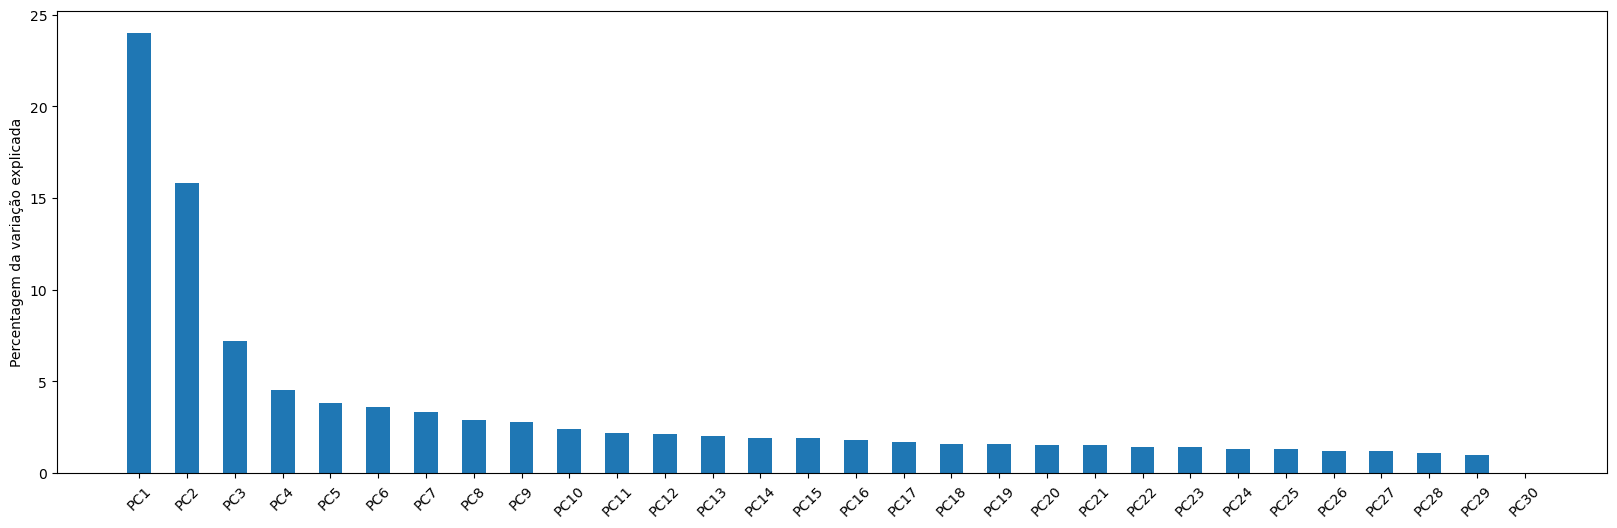

0.7029660476600381 9
0.7252925711182635 10
0.7459084862141242 11
0.7655689522059184 12
0.784646125267031 13
0.8032540531492965 14
0.8208933464185278 15
0.8381603042439878 16
0.8544191596971646 17
0.870219039463503 18
0.885479340219954 19
0.9002390716175566 20
0.9145765225538591 21
0.9286066761961073 22
0.9417117901049409 23
0.9542615375943397 24
0.96656890113659 25
0.9784820012019475 26
0.9897647582223361 27
1.0 28
1.0 29


In [8]:
n=30
# 30 amostras para análise
pca = PCA(n_components=n)
data_scale = preprocessing.scale(data)
pca.fit(data_scale)                                                           # media e desvio
x_reduced = pca.transform(data_scale)   
principalComponents = pca.fit_transform(x_reduced)# escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:10]))                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)


plt.show()

soma=0
for i in range(len(pca.explained_variance_ratio_)):
    soma+=pca.explained_variance_ratio_[i]
    if soma>=0.70:
        print(soma,i)



O gráfico das percentagens de variabilidade explicadas por PC permite inferir que a partir dos 10 primeiros componentes a variabilidade adicional explicada por cada novo componente principal é muito baixa. Os 10 primeiros PC descrevem 72.5% da variabilidade, enquanto que os "standard" 90% de variabilidade são atingidos com 20 PC's.

Em seguida, fez-se uma análise dos scores do PCA com representação gráfica, de forma a melhor identificar correlações entre os dados e a perceber se existem tendências entre os diferentes protocolos implementados. Esta análise posiciona as amostras num espaço bidimensional, onde no eixo do x são separadas segundo o score do primeiro PCA e no eixo do y do segundo PCA.

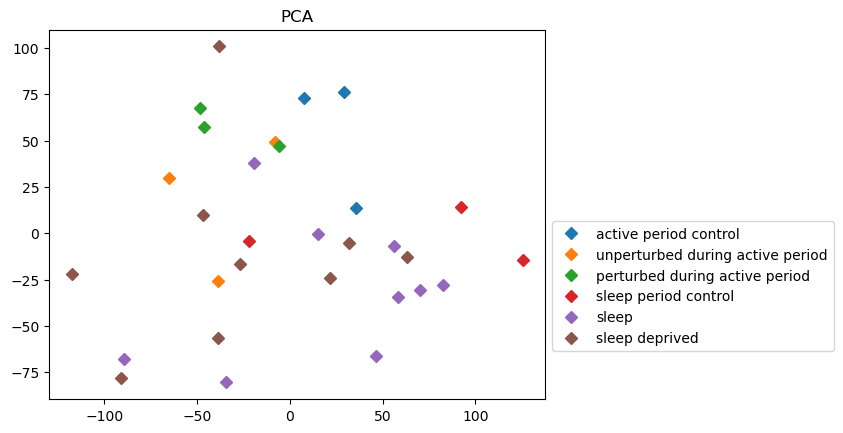

In [9]:
for tipo in meta['protocol'].unique():
    sp = data.index[meta['protocol']==tipo]
    l=[]
    for x in sp:
        idx = data.index.get_loc(x)
        l.append(idx)
    plt.plot(x_reduced[l,0],x_reduced[l,1], 'D' , label=tipo)
plt.title("PCA")
plt.legend(loc='best', shadow=False, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()



        

Apesar de se verificar que, por exemplo, entre os protocolos de 'sleep' e 'sleep deprived' ocorre uma separação sobretudo segundo o 1º PCA, esta não é tão evidente quanto se esperaria, já que existe bastante dispersão. Pode-se também identificar uma boa concentração das amostras de 'perturbed during active protocol', o que indicará padrões de ativação génica bastante semelhantes entre estas amostras, o que pode ser sinónimo da boa qualidade destas amostras. Apesar de uma maior separação no 2º PCA, as amostras de 'active period control' são também bastante próximas entre si. Para as amostras de 'sleep period control', a sua separação ocorre sobretudo segundo o 1º PCA, quase não se verificando dispersão no eixo dos y (2º PCA). Isto deve-se ao facto de os genes usados para construir o 1º PCA apresentarem valores mais díspares para estas amostras. Por fim, as amostras de 'unperturbed during active period' apresentam também agrupamento relativamente bom.

Contudo, a grande dispersão dos restantes dados torna difícil a análise destes dados, pelo o que em seguida se experimentou fazer esta análise, separando as amostras segundo o protocolo utilizado mas também o tempo de exposição a este:

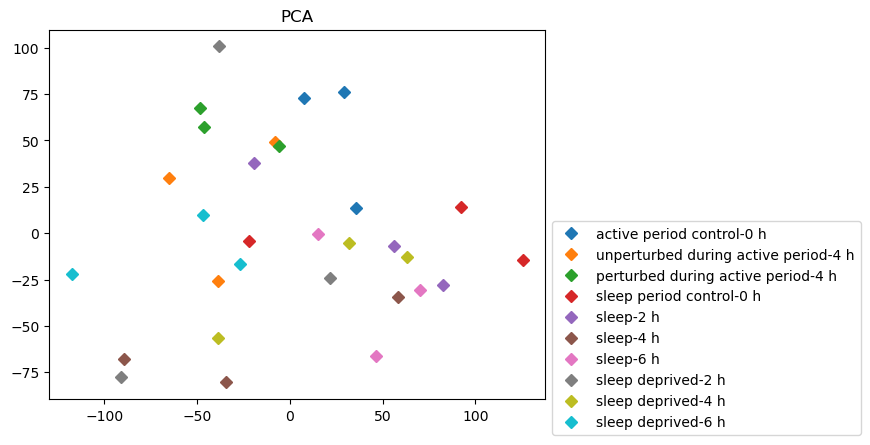

In [10]:
meta_data = meta
meta_data['labels'] = meta_data['protocol'] + '-' + meta_data['time'].astype(str)
for tipo in meta['labels'].unique():
    sp = data.index[meta['labels']==tipo]
    l=[]
    for x in sp:
        idx = data.index.get_loc(x)
        l.append(idx)
    plt.plot(x_reduced[l,0],x_reduced[l,1], 'D' , label=tipo)
    i+=1
plt.title("PCA")
plt.legend(loc='best', shadow=False, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

Com este novo gráfico é possível identificar mais algumas tendências nos dados, sobretudo dentro dos grupos de 'sleep deprived' e 'sleep' que se encontravam agrupados sem atenção ao tempo de exposição no gráfico anterior. Assim, verifica-se que as amostras de 'sleep deprived-6h' estão também bem agupadas segundo o 2º PCA, apresentando apenas uma ligeira diferença nos valores dos genes que definem o 1º PCA. Pelo contrário, as amostras de 'sleep-6h' estão bem agrupadas segundo a combinação linear dos genes definidores do 1º PCA. Contudo, para as amostras de 'sleep deprived-2h' a dispersão é extremamente elevada.

De uma forma geral, pode-se afirmar que a qualidade dos dados é boa, revelando-se alguns padrões nas amostras de cada protocolo + tempo de exposição. Apesar disso, a dispersão é algo confusa. Talvez esta análise pudesse ser um pouco mais conclusiva se se tivesse acesso a dados de mais amostras para cada tipo de protocolo onde se pudessem notar mais tendências dentro de cada um. 

**SECÇÃO 2**

Análise estatística dos dados

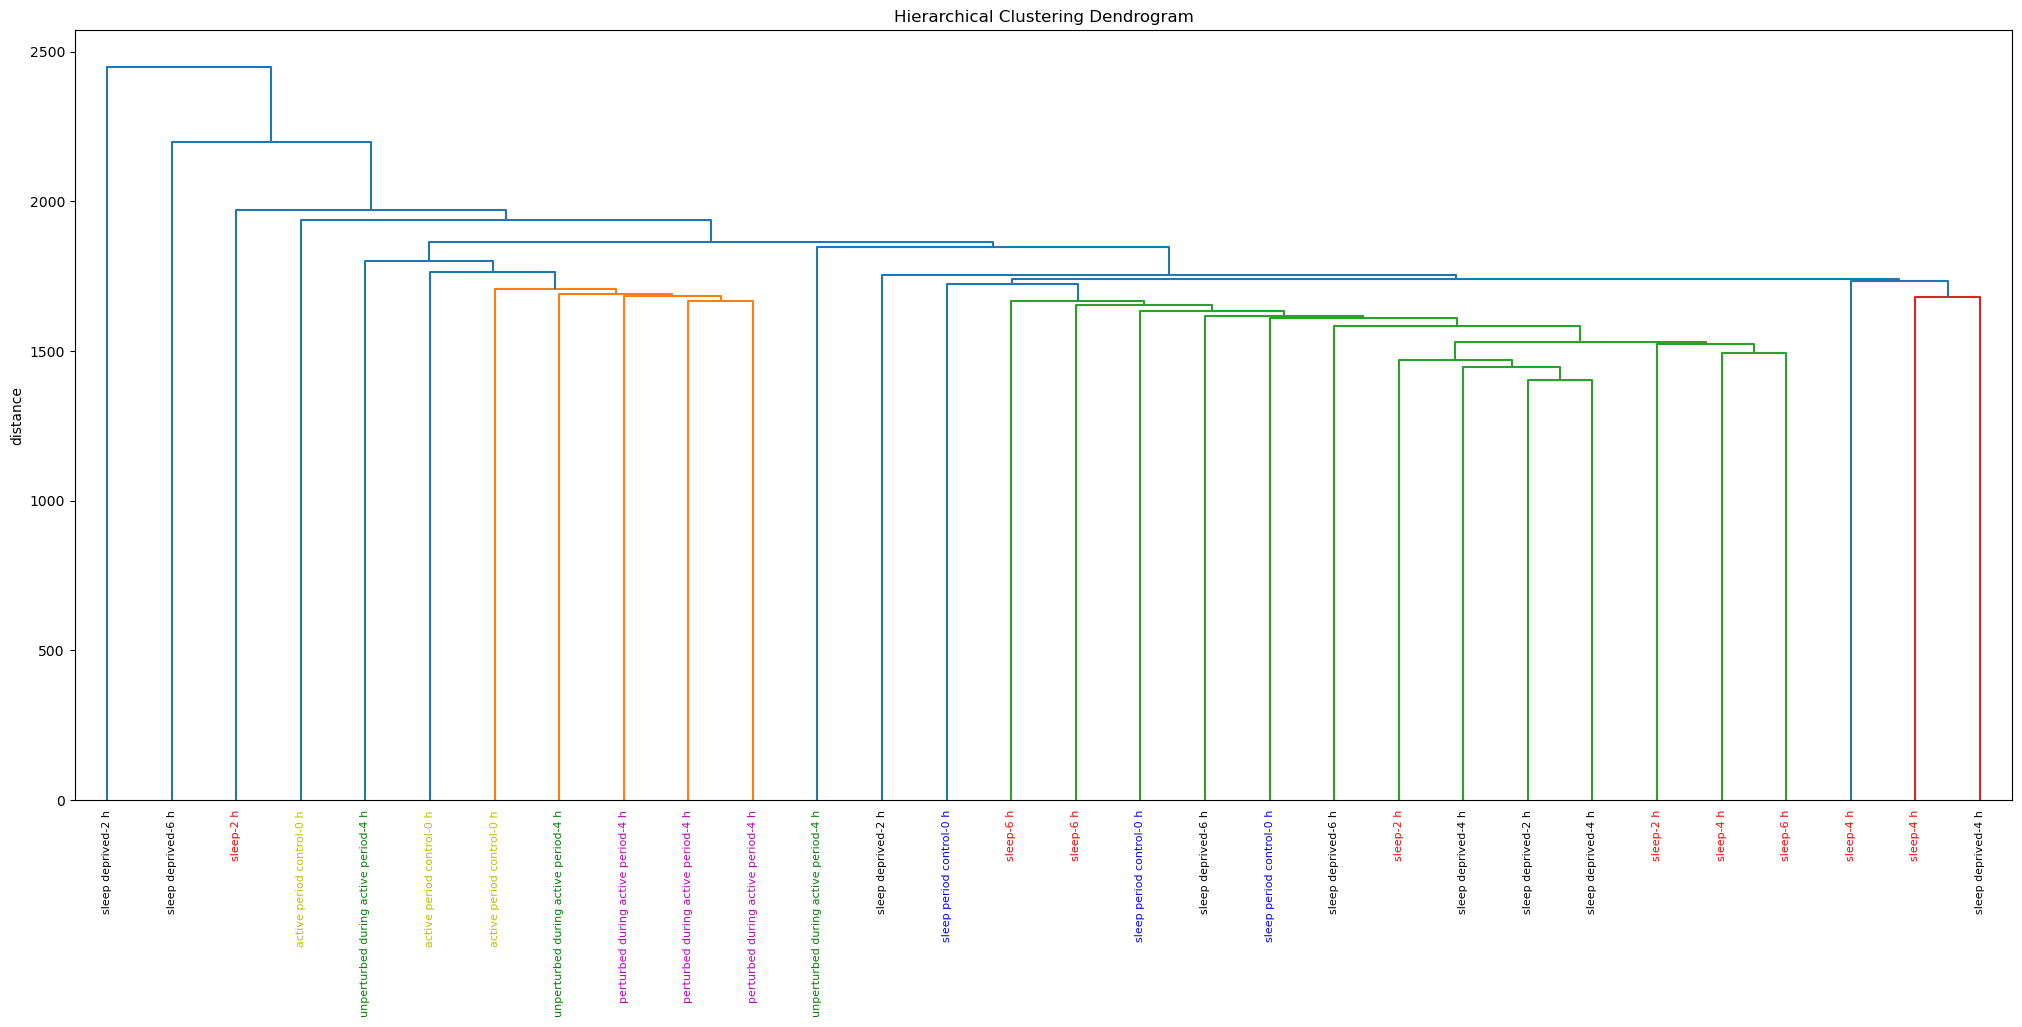

In [11]:
Z = linkage(data, metric='cityblock')
meta_data = meta
meta_data['labels'] = meta_data['protocol'] + '-' + meta_data['time'].astype(str)

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(meta_data['labels']),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'active period control-0 h': 'y', 
                'unperturbed during active period-4 h': 'g', 
                'perturbed during active period-4 h': 'm',
                'sleep period control-0 h': 'b', 
                'sleep-2 h': 'r',
                'sleep-4 h': 'r',
                'sleep-6 h': 'r',
                'sleep deprived-2 h': 'k',
                'sleep deprived-4 h': 'k',
                'sleep deprived-6 h': 'k',
               }
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

O cluster hierárquico permite retirar desde já algumas conclusões:

    - as moscas que dormiram apresentam padrões de expressão mais próximos entre si, qualquer que seja o período, estando localizados na sua maioria no cluster verde.
    
    - as moscas perturbadas durante o período ativo apresentam igualmente padrões muito próximos entre si (cluster laranja), o que pode revelar que há mecanismos comuns que são ativados em qualquer mosca que seja perturbada (talvez algum complexo de "fight or flight".
    
    - as moscas privadas do sono apresentam expressões mais variadas, o que pode significar que o tipo de resposta nestas situações varia de organismo para organismo e ao longo do tempo a que estão sujeitos a esta imposição. Como a privação do sono costuma provocar uma desregulação das funções normais, essa desregulação pode ocorrer de forma diferente para cada um.

In [12]:
from sklearn.cluster import KMeans

k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['protocol'], rownames=['clusters'] )

protocol,active period control,perturbed during active period,sleep,sleep deprived,sleep period control,unperturbed during active period
clusters,,,,,,
0,0,0,0,1,0,0
1,0,0,2,3,0,1
2,1,0,6,4,2,0
3,2,3,1,1,1,2


Esta análise de cluster realizada por *kmeans* comprovam as conclusões anteriores, onde se verifica que as moscas que dormiram se concentram maioritariamente no cluster 1, as perturbadas no período ativo se encontram todas no cluster 2 e as que foram privadas de sono apresentam uma distribuição errática.

**SECÇÃO 3**

A fase seguinte é a de implementação de modelos de *Machine Learning*. Para isso, é necessário dividir os dados em conjuntos de treino e de teste. O primeiro serve de input ao modelo para que este possa criar as suas relações e o segundo, como o nome indica, permite que essas relações sejam testadas e ver até que ponto foram eficazes a prever o ambiente a que as moscas haviam sido sujeitas.

In [13]:
from sklearn.model_selection import train_test_split

input_data = data.values
#output_data = meta_data['labels'].values
output_data = meta['protocol'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))

treinoX, testeX, treinoY, testeY = train_test_split(input_sc, output_data, train_size=2/3, random_state=0)
print("TreinoX ", treinoX.shape)
print("TesteX", testeX.shape)
print("TreinoY ", treinoY.shape)
print("TesteY", testeY.shape)

30
TreinoX  (20, 14010)
TesteX (10, 14010)
TreinoY  (20,)
TesteY (10,)


K-neighbours

In [14]:
knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)

from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(preds_knn, testeY))

Accuracy:  0.3


C:\Users\larat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Modelo de Decision Tree

In [15]:
from sklearn import tree
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)
print('Accuracy: ', tree_model.score(testeX,  testeY))

Accuracy:  0.2


Regressao Logistica

In [16]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)
print('Accuracy: ', logistic.score(testeX,  testeY))

Accuracy:  0.5


SVM

In [17]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

Accuracy:  0.5


Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)
print('Accuracy: ', gnb_model.score(testeX,  testeY))

Accuracy:  0.2


Os modelos não conseguiram prever de forma eficaz o tipo de ambiente ('protocol') a que as moscas foram sujeitas, como se pode verificar pelos valores de 'accuracy' obtidos para cada um dos 5 modelos aplicados. O ideal seria conseguir prever com exatidão o conjunto das duas colunas significativas dos meta-dados: 'protocol' e 'time'. Ou seja, deviam conseguir prever o ambiente a que as moscas haviam sido sujeitas bem como a duração dessa exposição. Contudo, se os valores de 'accuracy' foram já tão baixos a prever apenas o 'protocol', seriam ainda piores a prever a combinação destas duas variáveis.

Isto pode dever-se ao número muito baixo de amostras disponíveis (apenas 30). Isto faz com que o subconjunto de treino seja muito pequeno (apenas 20, já que se dividiu o dataset em 2/3 para teste e 1/3 para treino), deixando os modelos com pouca informação para estabelecer as suas relações de forma assertiva.

Ainda assim, fez-se uma análise de *cross validation* para tentar perceber qual dos modelos foi mais bem-sucedido:

K-neighbours

In [19]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(estimator = knn, X= input_sc, y= output_data, cv= 3)
print("knn", scores_knn)
print('Média: ', scores_knn.mean())

knn [0.5 0.3 0.4]
Média:  0.4000000000000001


C:\Users\larat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\larat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Decision Tree

In [20]:
scores_tree_model = cross_val_score(estimator = tree_model, X= input_sc, y= output_data, cv= 3)
print("tree_model", scores_tree_model)
print('Média: ', scores_tree_model.mean())

tree_model [0.4 0.1 0.6]
Média:  0.3666666666666667


Regressão Logística

In [21]:
scores_logistic = cross_val_score(estimator = logistic, X= input_sc, y= output_data, cv= 3)
print("logistic", scores_logistic)
print('Média: ', scores_logistic.mean())

logistic [0.5 0.5 0.3]
Média:  0.43333333333333335


SVM

In [22]:
scores_svm = cross_val_score(estimator = svm_model, X= input_sc, y= output_data, cv= 3)
print("svm_model", scores_svm)
print('Média: ', scores_svm.mean())

svm_model [0.6 0.5 0.7]
Média:  0.6


Naive Bayes

In [23]:
scores_gnb_model = cross_val_score(estimator = gnb_model, X= input_sc, y= output_data, cv= 3)
print("gnb_model", scores_gnb_model)
print('Média: ', scores_gnb_model.mean())

gnb_model [0.5 0.2 0.6]
Média:  0.4333333333333333


In [24]:
tab = {'Modelo': ['K-Neighbours', 'Decision Tree', 'Regressao Logistica', 'SVM', 'Naive Bayes'],
        'Accuracy': [accuracy_score(preds_knn, testeY), tree_model.score(testeX,  testeY), logistic.score(testeX,  testeY), svm_model.score(testeX,  testeY), gnb_model.score(testeX,  testeY)],
        'Média CV': [scores_knn.mean(), scores_tree_model.mean(), scores_logistic.mean(), scores_svm.mean(), scores_gnb_model.mean()]}
tabela = pd.DataFrame(tab)

# Print the dataframe as a table
print(tabela.to_string())

                Modelo  Accuracy  Média CV
0         K-Neighbours       0.3  0.400000
1        Decision Tree       0.2  0.366667
2  Regressao Logistica       0.5  0.433333
3                  SVM       0.5  0.600000
4          Naive Bayes       0.2  0.433333


Através desta análise, percebe-se que apesar das limitações, o modelo que se portou melhor foi o SVM.

Como aquilo que se pretende ultimamente com o modelo é conseguir prever se a mosca esteve num período de sono ou de privação deste, e de forma a melhor a 'accuracy' dos modelos, decidiu-se remover as 'samples' das moscas usadas para estudar o período ativo, mantendo apenas as de controlo de sono, sono e privação do sono. Desta forma os dados utilizados para treino terão maior percentagem de informação relevante par as relações que se quer estabelecer.

In [25]:
# Junção das duas bases de dados através do número da amostra
#data=data_reduced.transpose()
merged = pd.merge(data, meta, left_index=True, right_on='sample')

# Selecionar as instâncias que têm a palavra 'active' no atributo 'protocol'
active_rows = merged[merged['protocol'].str.contains('active')]
#print(active_rows)

# Eliminar as instâncias selecionadas atrás dos dados e metadados
data = data[~data.index.isin(active_rows.index)]
meta = meta[~meta.index.isin(active_rows['sample'])]


In [26]:
#Definição dos conjuntos de treino e teste com os novos dados e metadados

input_data = data.values
#output_data = meta_data['labels'].values
output_data = meta['protocol'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))

treinoX, testeX, treinoY, testeY = train_test_split(input_sc, output_data, train_size=2/3, random_state=0)
print("TreinoX ", treinoX.shape)
print("TesteX", testeX.shape)
print("TreinoY ", treinoY.shape)
print("TesteY", testeY.shape)

21
TreinoX  (14, 14010)
TesteX (7, 14010)
TreinoY  (14,)
TesteY (7,)


K-Neighbours

In [27]:
knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(preds_knn, testeY))
      
scores_knn = cross_val_score(estimator = knn, X= input_sc, y= output_data, cv= 3)
print("knn", scores_knn)
print('Média: ', scores_knn.mean())

Accuracy:  0.7142857142857143
knn [0.57142857 0.28571429 0.57142857]
Média:  0.4761904761904761


C:\Users\larat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\larat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Modelo de Decision Tree

In [28]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)
print('Accuracy: ', tree_model.score(testeX,  testeY))

scores_tree_model = cross_val_score(estimator = tree_model, X= input_sc, y= output_data, cv= 3)
print("tree_model", scores_tree_model)
print('Média: ', scores_tree_model.mean())

Accuracy:  0.2857142857142857
tree_model [0.57142857 0.57142857 0.85714286]
Média:  0.6666666666666666


Regressao Logistica

In [29]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)
print('Accuracy: ', logistic.score(testeX,  testeY))

scores_logistic = cross_val_score(estimator = logistic, X= input_sc, y= output_data, cv= 3)
print("logistic", scores_logistic)
print('Média: ', scores_logistic.mean())

Accuracy:  0.2857142857142857
logistic [0.28571429 0.14285714 0.14285714]
Média:  0.19047619047619047


SVM

In [30]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)
print('Accuracy: ', svm_model.score(testeX,  testeY))

scores_svm = cross_val_score(estimator = svm_model, X= input_sc, y= output_data, cv= 3)
print("svm_model", scores_svm)
print('Média: ', scores_svm.mean())

Accuracy:  0.8571428571428571
svm_model [0.57142857 0.42857143 0.85714286]
Média:  0.6190476190476191


Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)
print('Accuracy: ', gnb_model.score(testeX,  testeY))

scores_gnb_model = cross_val_score(estimator = gnb_model, X= input_sc, y= output_data, cv= 3)
print("gnb_model", scores_gnb_model)
print('Média: ', scores_gnb_model.mean())

Accuracy:  0.5714285714285714
gnb_model [0.71428571 0.28571429 0.85714286]
Média:  0.6190476190476191


In [32]:
tab = {'Modelo': ['K-Neighbours', 'Decision Tree', 'Regressao Logistica', 'SVM', 'Naive Bayes'],
        'Accuracy': [accuracy_score(preds_knn, testeY), tree_model.score(testeX,  testeY), logistic.score(testeX,  testeY), svm_model.score(testeX,  testeY), gnb_model.score(testeX,  testeY)],
        'Média CV': [scores_knn.mean(), scores_tree_model.mean(), scores_logistic.mean(), scores_svm.mean(), scores_gnb_model.mean()]}
tabela = pd.DataFrame(tab)

# Print the dataframe as a table
print(tabela.to_string())

                Modelo  Accuracy  Média CV
0         K-Neighbours  0.714286  0.476190
1        Decision Tree  0.285714  0.666667
2  Regressao Logistica  0.285714  0.190476
3                  SVM  0.857143  0.619048
4          Naive Bayes  0.571429  0.619048


Verifica-se assim que os modelos conseguem ser mais eficazes com o novo dataset. Isto deve-se também ao facto de agora apenas terem de prever entre 3 hipóteses, o que reduz a probabilidade de erro. De qualquer forma, considera-se estes modelos mais interessantes para a aplicação prática do problema em estudo.

**Filtro de Variância**


Como foi referido ao longo deste estudo, um dos principais problemas, para além do baixo número de amostras, é o de o dataset apresentar uma dimensionalidade extremamente elevada. Isto pode reduzir a qualidade dos modelos gerados e a sua aplicabilidade futura, pela procura de relações na expressão de genes pouco impactados pela privação do sono. Assim, no passo seguinte, pretendeu-se reduzir o número de genes em estudo, gerando-se de novo os modelos para estudar a eficácia deste processamento.

In [33]:
variances=data.var(axis=0)
meanvar=variances.mean()
sel=VarianceThreshold(threshold=meanvar*4)
filt = sel.fit_transform(data)
filt_df = pd.DataFrame(filt, columns=data.columns[sel.get_support()])
print(filt_df)
print("Dados originais:",data.shape)
print("Dados após filtragem de variância:",filt_df.shape)
per = (327/14010)*100
print(per)

    141218_at  141233_at  141315_at  141374_at  141379_at  141383_at  \
0     6.49789    2.64825    7.11748    4.55974    3.26292    5.70002   
1     7.00378    2.71240    6.99373    6.43923    3.84511    6.13054   
2     6.18008    2.60674    6.98182    4.37086    3.18302    5.30238   
3     6.52619    2.67694    6.69505    4.26992    2.94314    5.85348   
4     6.09687    2.81242    7.08263    4.63868    3.14088    5.54609   
5     6.83792    2.83341    6.85067    4.16463    3.09135    5.82867   
6     6.89410    3.00848    6.32468    4.22310    2.99197    5.59773   
7     6.52430    3.02307    6.66466    4.85454    4.07126    5.33117   
8     7.08327    2.82539    6.34231    4.69559    2.97382    5.98349   
9     7.10943    2.76708    6.30991    5.47565    3.04488    5.68891   
10    6.48753    2.78932    6.30224    4.07004    3.25813    5.65806   
11    7.14977    2.57728    6.05867    4.04808    3.06535    5.94533   
12    6.70218    3.26836    6.52347    4.74540    3.31687    5.4

Dos resultados obtidos a partir do filtro VarianceThreshold, deduz-se que dos 14010 genes presentes no dataset, apenas uma pequena parte dos mesmos possui diferenças significativas entre as diferentes amostras. Reduz-se assim a análise para apenas 327 genes (2.34% do número original).

In [34]:
#Definição dos conjuntos de treino e teste com os novos dados e metadados

input_data = filt_df.values
#output_data = meta_data['labels'].values
output_data = meta['protocol'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))

treinoX, testeX, treinoY, testeY = train_test_split(input_sc, output_data, train_size=2/3, random_state=0)
print("TreinoX ", treinoX.shape)
print("TesteX", testeX.shape)
print("TreinoY ", treinoY.shape)
print("TesteY", testeY.shape)

#K-Neighbours
knn = KNeighborsClassifier()
knn.fit(treinoX, treinoY)
preds_knn = knn.predict(testeX)
      
scores_knn = cross_val_score(estimator = knn, X= input_sc, y= output_data, cv= 3)

#Decision Tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(treinoX, treinoY)

scores_tree_model = cross_val_score(estimator = tree_model, X= input_sc, y= output_data, cv= 3)

#Regressão Logística
logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(treinoX, treinoY)

scores_logistic = cross_val_score(estimator = logistic, X= input_sc, y= output_data, cv= 3)

#SVM
svm_model = svm.SVC(kernel='linear', C=1)
svm_model = svm_model.fit(treinoX, treinoY)

scores_svm = cross_val_score(estimator = svm_model, X= input_sc, y= output_data, cv= 3)


#Naive Bayes
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(treinoX, treinoY)

scores_gnb_model = cross_val_score(estimator = gnb_model, X= input_sc, y= output_data, cv= 3)

#Tabela
tab = {'Modelo': ['K-Neighbours', 'Decision Tree', 'Regressao Logistica', 'SVM', 'Naive Bayes'],
        'Accuracy': [accuracy_score(preds_knn, testeY), tree_model.score(testeX,  testeY), logistic.score(testeX,  testeY), svm_model.score(testeX,  testeY), gnb_model.score(testeX,  testeY)],
        'Média CV': [scores_knn.mean(), scores_tree_model.mean(), scores_logistic.mean(), scores_svm.mean(), scores_gnb_model.mean()]}
tabela = pd.DataFrame(tab)

# Print the dataframe as a table
print(tabela.to_string())

21
TreinoX  (14, 327)
TesteX (7, 327)
TreinoY  (14,)
TesteY (7,)
                Modelo  Accuracy  Média CV
0         K-Neighbours  0.857143  0.714286
1        Decision Tree  0.714286  0.523810
2  Regressao Logistica  0.571429  0.571429
3                  SVM  0.714286  0.809524
4          Naive Bayes  0.714286  0.714286


C:\Users\larat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\larat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Antes de mais, note-se que a redução da dimensionalidade dos dados foi aplicada ao dataset já processado para incluir apenas as amostras relativas aos protocolos de controlo de sono, sono e privação do sono.

Como se pode ver, pela comparação com a tabela dos resultados de 'accuracy' e 'cross validation' dos modelos gerados com o dataset com o número de atributos original, a redução da dimensionalidade permite a criação de modelos com mais qualidade na predição do protocolo aplicado. De uma forma geral, todos os modelos estudados melhoram a sua performance após a eliminação dos genes menos significativos. Isto, tal como já referido anteriormente, deve-se ao facto de os modelos terem apenas de se focar naqueles genes cuja expressão é realmente mais afetada pela privação do sono e evitando a criação de relações redundantes e pouco explicativas.

**Conclusão**

Devido à baixa amostragem do estudo disponibilizada no dataset, a geração de modelos de machine learning revelou-se bastante difícil. As boas 'accuracies' alcançadas na segunda fase de criação dos modelos foram apenas alcançáveis reduzindo o número de resultados possíveis, sendo que nesta o número de amostras para treino e teste dos modelos foi ainda menor. Isto corresponde a uma manipulação excessiva dos dados e que pode acabar por não traduzir de forma correta a realidade.

Por estas razões, o foco do trabalho focou-se sobretudo no "Data Processing", onde o principal objetivo foi a redução sustentável da grande dimensionalidade da base de dados. Pretendeu-se reduzir a análise aos genes que realmente são mais influenciados pelo sono ou ausência deste, tendo-se verificado que é possível gerar bons modelos com apenas 2.34% dos genes inicialmente estudados.